<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----

# Regularización, Regresión y Clasificación


En este ejercicio práctico se abordan los siguientes conceptos:
- Regularización Lasso y Ridge en modelos de regresión y clasificación.
- El parámetro C (inverso de la fuerza de regularización).
- Clasificación.
- Técnicas de validación cruzada (por ejemplo, stratified k-folds).
- Métricas de clasificación: F1-score, matriz de confusión, classification report, accuracy, recall.

El dataset a utilizar es el **Forest Covertypes** de scikit-learn.  
Para más información consulta:  
[Forest Covertypes dataset](https://scikit-learn.org/stable/datasets/real_world.html#forest-covertypes)  
[fetch_covtype documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype)



## Instrucciones

1. **Carga y Preprocesamiento:**  
   - Cargar el dataset Forest Covertypes utilizando `sklearn.datasets.fetch_covtype`.
   - Realizar un análisis exploratorio y dividir el dataset en conjuntos de entrenamiento y prueba.
   - (Opcional) Estandarizar los predictores, ya que las técnicas de regularización son sensibles a la escala.

2. **Modelos de Regresión Regularizada:**  
   - Implementa modelos de regresión Ridge y Lasso sobre un problema de regresión (puedes transformar el problema en uno binario o utilizar un subconjunto).
   - Analiza el efecto del parámetro de regularización λ (alpha) sobre la magnitud de los coeficientes.

3. **Modelo de Clasificación:**  
   - Implementa un modelo de regresión logística regularizada (puedes utilizar L1 o L2) para clasificar el dataset original.
   - Interpreta los coeficientes obtenidos, considerando la relación entre los predictores y la variable respuesta.

4. **Validación Cruzada:**  
   - Utiliza Stratified K-Folds (por ejemplo, 5 folds) para evaluar el desempeño del modelo de clasificación.
   - Calcula las métricas (accuracy, recall, F1-score, matriz de confusión y classification report) tanto en validación cruzada como en el conjunto de prueba.

5. **Comentarios y Explicaciones:**  
   - Cada bloque de código debe incluir comentarios explicativos y, cuando sea necesario, fórmulas en los bloques Markdown por ejemplo, la fórmula del F1-score:  
     $$
     F1 = \frac{2 \times \text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
     $$.

----------

A continuación, se muestra el código base:


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

# Cargar el dataset Forest Covertypes

In [2]:
data = fetch_covtype()
X = data.data
y = data.target

## Paso 1: Análisis Exploratorio y Preprocesamiento

Realice un análisis exploratorio riguroso del dataset. Se recomienda:

- Convertir el dataset a un `DataFrame` de pandas y visualizar las primeras filas usando `.head()`.
- Revisar las dimensiones del DataFrame (número de filas y columnas) con `.shape`.
- Verificar la tipología de las variables, determinando cuántas son numéricas y cuántas son categóricas.
- Comprobar si existen valores nulos en cada columna.
- Calcular y visualizar la matriz de correlación de Pearson para las variables numéricas.
- Realizar un análisis univariado mediante histogramas, boxplots y scatterplots (comparando cada variable numérica con la variable objetivo).
- Analizar la distribución de la variable objetivo mediante `value_counts()` y gráficos, para detectar posibles desbalances en el dataset.
- Aplicar técnicas de normalización/estandarización (por ejemplo, Z-Score con StandardScaler y Min-Max Scaling) sobre los predictores.

Este análisis exploratorio (EDA) es fundamental para entender la estructura y calidad del dataset antes de proceder con el modelado.


# Preprocesamiento

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Convertir el dataset a DataFrame

In [4]:
df = pd.DataFrame(X, columns=data.feature_names if hasattr(data, 'feature_names') 
                else [f"Feature_{i}" for i in range(X.shape[1])])
df['target'] = y

# Visualizar las primeras filas y dimensiones del DataFrame

In [5]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [6]:
df.shape

(581012, 55)

# Revisar la tipología de variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

# Verificar valores nulos en el DataFrame


In [8]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


# Calcular y visualizar la matriz de correlación de Pearson para las variables numéricas

In [9]:
num_vars = df.select_dtypes(include="number")

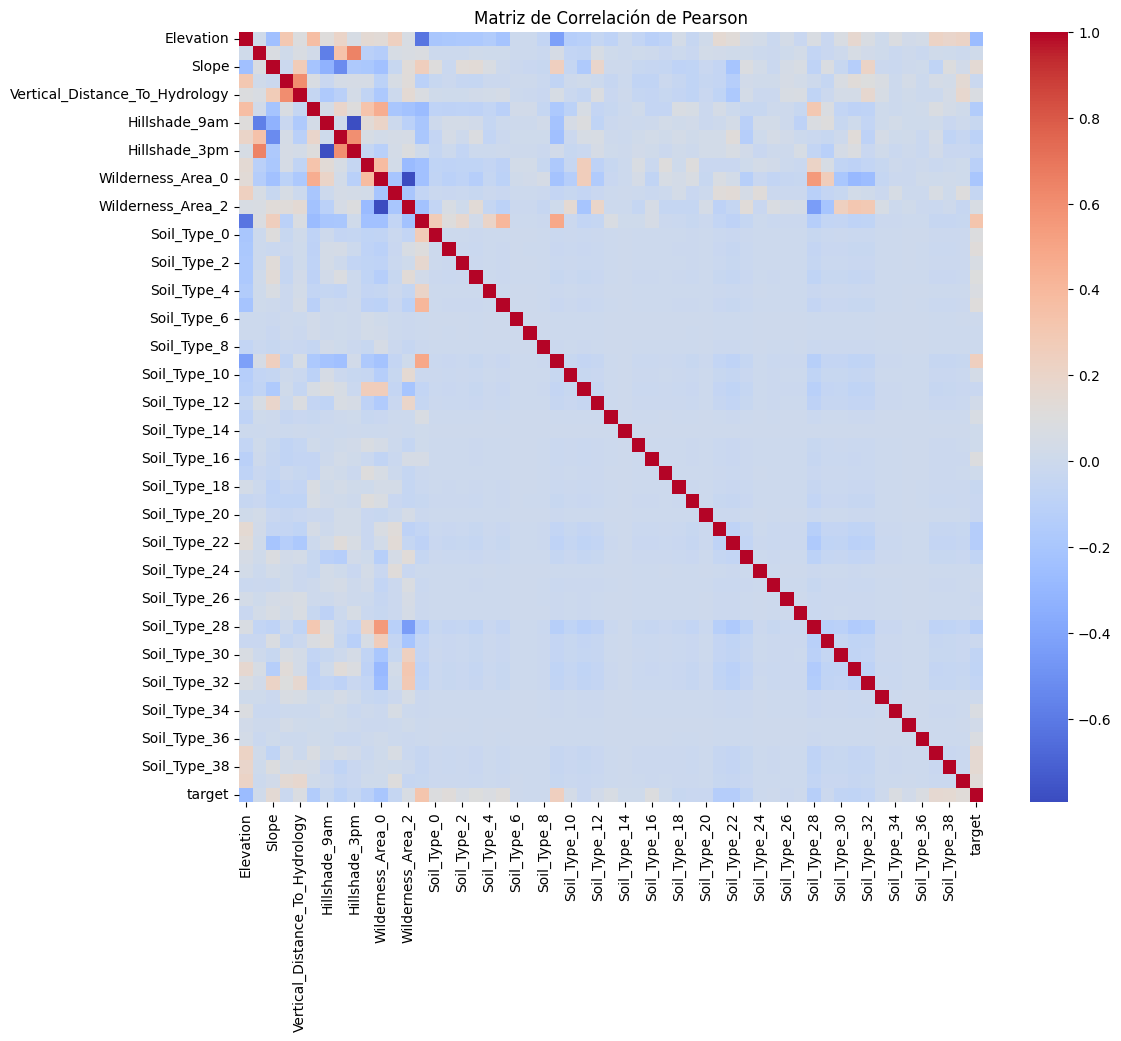

In [10]:
corr_matrix = num_vars.corr(method='pearson')
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Matriz de Correlación de Pearson")
plt.show()

# Que podemos decir de esta matriz de correlación?

In [ ]:
#It can be seen that in general the correlation between the varibales are not strong, and that most tend to be very close to 0 or negative correlations.
#Taking into account the target variable (target), the correlation is still low with the rest of the variables.

# Análisis bivariado respecto a la variable objetivo

verifica la distribución de las clases

Es un problema balanceado?

In [11]:
#Separating the variables
y = df['target']
X = df.drop(columns =['target'])

In [12]:
#The dataset is unbalanced, there are cases with 280 k samples while there is another class with only 2000 samples.
y.value_counts()

target
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

In [13]:
#It can be seen that class 1 and 2 hold more than 80% of the data.
y.value_counts(normalize=True) #this shows the proportion of each class

target
2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: proportion, dtype: float64

# Dividir el DataFrame en conjuntos de entrenamiento y prueba (70%-30%) manteniendo la estratificación

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=30, stratify=y)
print(X_train.shape, X_test.shape)

(406708, 54) (174304, 54)


# Aplicar normalización: StandardScaler (Z-Score) y Min-Max Scaling

Ajustar y transformar el conjunto de entrenamiento

In [15]:
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

X_train_std = scaler_std.fit_transform(X_train)
X_train_mm = scaler_mm.fit_transform(X_train)


# Transformar el conjunto de prueba

In [16]:
X_test_std = scaler_std.transform(X_test)
X_test_mm = scaler_mm.transform(X_test)

## Paso 2: Modelos de Regresión Regularizada

Ahora que se ha realizado un análisis exploratorio completo y se han generado conjuntos de entrenamiento y prueba con datos escalados, en este paso implementaremos modelos de regresión regularizada (Ridge y Lasso) sobre un problema simplificado.

**Objetivo:**  
- Seleccionar un subconjunto de predictores (por ejemplo, las primeras 5 columnas) y transformar la variable objetivo en un problema binario.  
- Utilizar los datos escalados (por ejemplo, el conjunto obtenido con StandardScaler) para ajustar modelos Ridge y Lasso.  
- Comparar el efecto del parámetro de regularización (alpha) sobre los coeficientes.

*Pistas:*  
- Transforme la variable target a binario, por ejemplo: asignar 1 si el valor es mayor que un umbral (p. ej., 2) y 0 en caso contrario.  
- Observe cómo varían los coeficientes al modificar el parámetro alpha.
  
_Función objetivo de Ridge:_  
$$
\text{Objetivo: } RSS + \lambda \sum_{j=1}^{p} \beta_j^2
$$
_Función objetivo de Lasso:_  
$$
\text{Objetivo: } RSS + \lambda \sum_{j=1}^{p} |\beta_j|
$$


In [25]:
# Seleccionar las primeras 5 variables del conjunto escalado y transformar la variable target
#debes convertir la variable objetivo a una variable binaria
#si es mayor que 2        => 1
# si es menor o igual a 2 = > 0
X_train_std_5 = X_train_std[:, 0:5]
print(X_train_std_5)

[[-0.99087239 -1.24875725 -0.013146    0.12057304  0.0276574 ]
 [ 0.96041436  0.2884478  -1.61656009  1.4429944   0.67960914]
 [ 0.2242146  -1.29344344 -1.21570657 -1.12655031 -0.77870398]
 ...
 [ 0.2706738   1.02130138 -1.08208872  0.06409953 -0.29831848]
 [ 0.31713301  0.333134   -1.21570657 -0.98536653 -0.88164373]
 [-2.62051847  1.32516749  1.18941456  0.34176095  1.31440427]]


In [21]:
y_train_bin = np.where(y_train > 2, 0, 1)
print(y_train_bin)

[1 1 1 ... 1 1 0]


In [35]:
y_test_bin = np.where(y_test > 2, 0, 1)
print(y_test_bin)

[1 1 1 ... 1 1 1]


# Modelo Ridge

In [30]:
alphaVar = 0.1

ridgeModel = Ridge(alpha = alphaVar, random_state = 42)
ridgeModel.fit(X_train_std_5, y_train_bin)
ridgeModel.coef_

array([ 0.14718129, -0.01092101, -0.03757801,  0.00190071, -0.03476904])

In [17]:
ridge_model = Ridge(alpha=1.0)  # Ajuste con alpha = 1.0 (puede variar este parámetro)
#TU CODIGO VA AQUI

#tome nora de sus observaciones

Coeficientes Ridge: [-0.14749998  0.01096182  0.03756682 -0.00143453  0.03491748]


# Modelo Lasso

In [31]:
lassoModel = Lasso(alpha = alphaVar, random_state=42)
lassoModel.fit(X_train_std_5, y_train_bin)
lassoModel.coef_

array([ 0.05346258, -0.        , -0.        ,  0.        , -0.        ])

In [18]:
lasso_model = Lasso(alpha=0.1)  # Ajuste con alpha = 0.1 (puede variar este parámetro)
#TU CODIGO VA AQUI

#tome nora de sus observaciones

Coeficientes Lasso: [-0.05356982  0.          0.         -0.          0.        ]


## Paso 3: Modelo de Clasificación - Regresión Logística Regularizada

En este paso se construirá un modelo de clasificación utilizando regresión logística regularizada. Aproveche los datos escalados obtenidos en el Paso 1.

**Objetivo:**  
- Ajustar un modelo de regresión logística (utilizando penalización L2 o L1) con el conjunto de entrenamiento completo.  
- Interpretar los coeficientes obtenidos, considerando que el parámetro C (inverso de la fuerza de regularización) controla la penalización: valores pequeños de C implican penalización fuerte, mientras que valores mayores permiten mayor flexibilidad.

*Pista:*  
- Use la versión estandarizada del conjunto de entrenamiento (X_train_std) para asegurar que la regularización actúe de manera equitativa en todos los predictores.


In [32]:
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
log_reg.fit(X_train_std, y_train_bin)
log_reg.coef_
#tome nora de sus observaciones

array([[ 0.80385463, -0.17456085,  0.10600688,  0.17879269, -0.19225701,
         0.2377576 ,  0.12687799, -0.0109662 ,  0.47669209, -0.07970111,
         0.71280395,  0.1530986 , -0.44230762, -0.69231396, -0.59541104,
        -0.33123775, -0.11648208, -0.32460268, -0.43082515, -0.03874787,
         0.06485708,  0.0841234 ,  0.29347645, -0.1244057 ,  0.00696988,
         1.29938473,  0.02072106, -0.31724636, -0.02142764, -0.05353279,
        -0.12504258, -0.05041939,  0.0161915 ,  0.07198738,  0.05111545,
         0.37427333,  0.07354587,  0.25444512,  0.16464098,  0.04884902,
         0.02445161,  0.1224739 , -0.21221008, -0.37442956,  0.27470337,
         0.22053003,  0.2918431 ,  0.02537321, -0.27375722, -0.05812094,
        -0.34621068, -0.70492429, -0.6115419 , -0.57539803]])

## Paso 4: Validación Cruzada

Utilice la técnica de validación cruzada con Stratified K-Folds para evaluar el desempeño del modelo de clasificación ajustado.

**Objetivo:**  
- Configurar una validación cruzada con 5 folds, que preserve la distribución de la variable objetivo.  
- Obtener predicciones a través de `cross_val_predict` y calcular las métricas: accuracy, recall, F1-score, matriz de confusión y classification report.

*Pista:*  
- Asegúrese de utilizar el conjunto de entrenamiento estandarizado (X_train_std) y la variable objetivo (y_train).

In [33]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_train_pred = cross_val_predict(log_reg, X_train_std, y_train_bin, cv=skf)

print(accuracy_score(y_train_bin, y_train_pred))
print(recall_score(y_train_bin, y_train_pred))
print(f1_score(y_train_bin, y_train_pred))
print(confusion_matrix(y_train_bin, y_train_pred))
print(classification_report(y_train_bin, y_train_pred))

0.9323667102687924
0.9732918251115125
0.9608267859507911
[[ 41860  18250]
 [  9257 337341]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.75     60110
           1       0.95      0.97      0.96    346598

    accuracy                           0.93    406708
   macro avg       0.88      0.83      0.86    406708
weighted avg       0.93      0.93      0.93    406708



# Validación Cruzada con StratifiedKFold (opcional Toma tiempo)

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
#TU CODIGO VA AQUI



#CUAL ES EL RENDIMIENTO ESPERADO EN EL CONJUNTO DE PRUEBA??


## Paso 5: Evaluación del Modelo en el Conjunto de Prueba

Utilice el modelo de regresión logística entrenado en el Paso 3 para verificar su estimación y realizar predicciones sobre el conjunto de prueba escalado.

**Objetivo:**  
- Calcular y visualizar las métricas de evaluación: accuracy, recall (macro), F1-score (macro), matriz de confusión y classification report.
- Compare los resultados obtenidos en el conjunto de prueba con los de la validación cruzada.

*Pista:*  
- Emplee las funciones `accuracy_score`, `recall_score`, `f1_score`, `confusion_matrix` y `classification_report` de scikit-learn.

In [34]:
y_train_pred = log_reg.predict(X_train_std)

print(accuracy_score(y_train_bin, y_train_pred))
print(recall_score(y_train_bin, y_train_pred))
print(f1_score(y_train_bin, y_train_pred))
print(confusion_matrix(y_train_bin, y_train_pred))
print(classification_report(y_train_bin, y_train_pred))

0.9323544164363622
0.9733120214196274
0.9608207254830478
[[ 41848  18262]
 [  9250 337348]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.75     60110
           1       0.95      0.97      0.96    346598

    accuracy                           0.93    406708
   macro avg       0.88      0.83      0.86    406708
weighted avg       0.93      0.93      0.93    406708



# Evaluación en el conjunto de prueba

In [36]:
y_test_pred = log_reg.predict(X_test_std)

print(accuracy_score(y_test_bin, y_test_pred))
print(recall_score(y_test_bin, y_test_pred))
print(f1_score(y_test_bin, y_test_pred))
print(confusion_matrix(y_test_bin, y_test_pred))
print(classification_report(y_test_bin, y_test_pred))

0.932950477326969
0.9746470718916408
0.9612038201971179
[[ 17840   7921]
 [  3766 144777]]
              precision    recall  f1-score   support

           0       0.83      0.69      0.75     25761
           1       0.95      0.97      0.96    148543

    accuracy                           0.93    174304
   macro avg       0.89      0.83      0.86    174304
weighted avg       0.93      0.93      0.93    174304



# Compara  con otros modelos

utiliza random forest y XGBoost para seleccion de caracteristicas, y realiza un reporte comparando el rendimiento de diferenes clasificadores empleando los subconjuntos de carácteristicas seleccionados por estos modelos:


In [ ]:
#! pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/150.0 MB 18.0 MB/s eta 0:00:09
   - -------------------------------------- 4.2/150.0 MB 13.2 MB/s eta 0:00:12
   - -------------------------------------- 5.8/150.0 MB 10.7 MB/s eta 0:00:14
   --- ------------------------------------ 11.3/150.0 MB 15.5 MB/s eta 0:00:09
   ---- ----------------------------------- 16.8/150.0 MB 17.6 MB/s eta 0:00:08
   ----- ---------------------------------- 22.0/150.0 MB 19.0 MB/s eta 0:00:07
   ------- -------------------------------- 27.8/150.0 MB 20.4 MB/s eta 0:00:06
   -------- ------------------------------- 33.3/150.0 MB 21.2 MB/s eta 0:00:06
   ---------- ----------------------------- 38.8/150.0 MB 21.8 MB/s eta 0:00:06
   ----------- ---------------------------- 43.5/150.0 MB 21.9 MB/s eta 0:00:05
   ------------ --------------------------- 48.5/150.0 MB 22.2 MB/s eta 0:00:05
   -------------- ------------------------- 53.5/150


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Primeras filas del dataset generado:
       edad  horas_entrenamiento  nivel_tecnico  experiencia_competencia  \
0 -1.023683            -0.338038       0.095223                 0.909996   
1 -0.072434            -1.343255      -1.573744                -0.503298   
2  0.652927             0.952030      -0.651159                 0.649276   
3 -0.090342             0.416601      -2.554622                -1.223006   
4 -0.928448             0.633686      -2.860930                -0.621349   

   color_uniforme  dia_nacimiento  mes_nacimiento  ganador_medalla  
0       -0.575858       -0.393553       -0.741334                0  
1       -2.479424       -0.850589        0.355713                0  
2        1.016390        2.349099       -0.390819                1  
3       -1.544572       -0.771141       -0.827738                0  
4       -2.183616       -1.454789        0.069261                0  


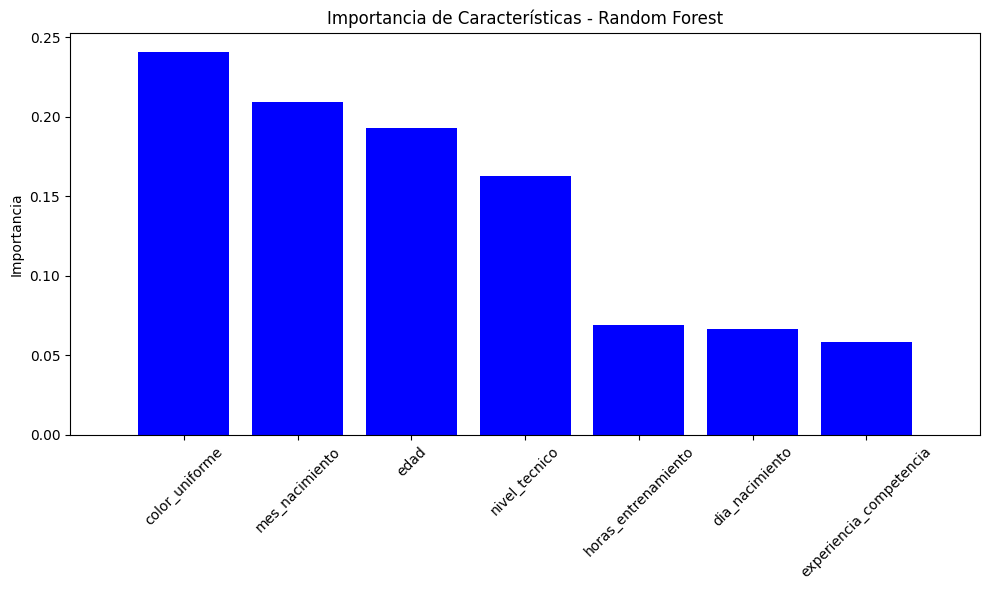

c:\Users\diana\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:32:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


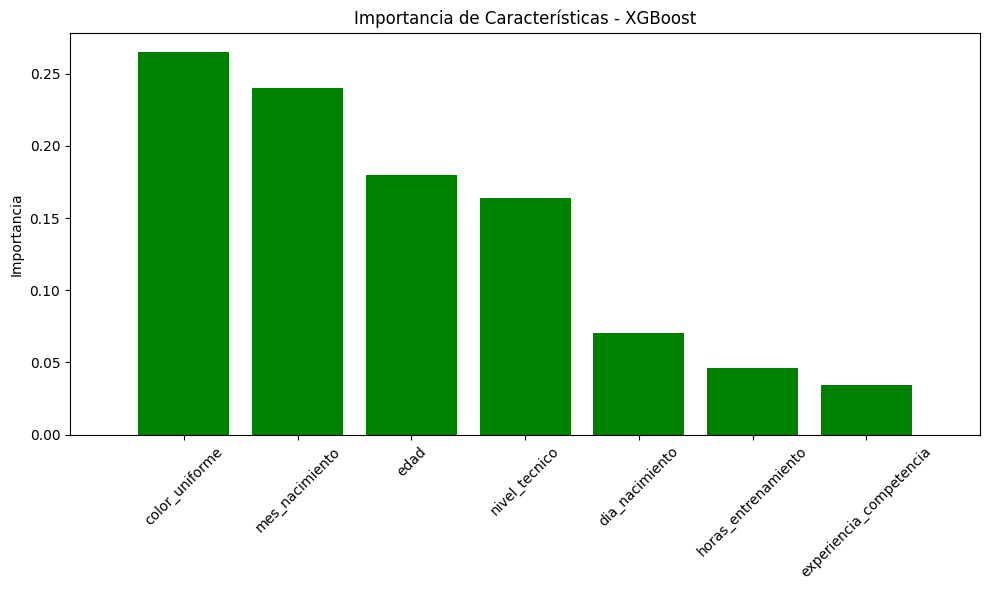


Comparación de importancia de características:
            Característica  Importancia RF  Importancia XGB  \
4           color_uniforme        0.240804         0.265104   
6           mes_nacimiento        0.209479         0.240367   
0                     edad        0.192915         0.179892   
2            nivel_tecnico        0.162824         0.164180   
5           dia_nacimiento        0.066371         0.070475   
1      horas_entrenamiento        0.069280         0.045821   
3  experiencia_competencia        0.058326         0.034161   

   Importancia_promedio  
4              0.252954  
6              0.224923  
0              0.186404  
2              0.163502  
5              0.068423  
1              0.057550  
3              0.046244  

Accuracy con 7 características (Random Forest (todas)): 0.9433
Características usadas: ['edad', 'horas_entrenamiento', 'nivel_tecnico', 'experiencia_competencia', 'color_uniforme', 'dia_nacimiento', 'mes_nacimiento']

Accuracy con 7 carac

c:\Users\diana\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:32:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Accuracy con 4 características (Random Forest (solo relevantes)): 0.8667
Características usadas: ['edad', 'horas_entrenamiento', 'nivel_tecnico', 'experiencia_competencia']

Accuracy con 4 características (XGBoost (solo relevantes)): 0.8300
Características usadas: ['edad', 'horas_entrenamiento', 'nivel_tecnico', 'experiencia_competencia']


c:\Users\diana\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:32:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Accuracy con 4 características (Random Forest (top 4 RF)): 0.9500
Características usadas: ['color_uniforme', 'mes_nacimiento', 'edad', 'nivel_tecnico']

Accuracy con 4 características (XGBoost (top 4 XGB)): 0.9500
Características usadas: ['color_uniforme', 'mes_nacimiento', 'edad', 'nivel_tecnico']


c:\Users\diana\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:32:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [39]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# 1. Generación del dataset artificial
np.random.seed(42)

# Crear dataset con 4 características relevantes y 3 irrelevantes
X, y = make_classification(
    n_samples=1000,
    n_features=7,  # 4 relevantes + 3 irrelevantes
    n_informative=4,  # Características relevantes
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    weights=[0.8, 0.2],  # 80% clase 0, 20% clase 1
    random_state=42
)

# Crear DataFrame con nombres descriptivos
feature_names = [
    'edad',  # Relevante 1
    'horas_entrenamiento',  # Relevante 2
    'nivel_tecnico',  # Relevante 3
    'experiencia_competencia',  # Relevante 4
    'color_uniforme',  # Irrelevante 1
    'dia_nacimiento',  # Irrelevante 2
    'mes_nacimiento'  # Irrelevante 3
]

df = pd.DataFrame(X, columns=feature_names)
df['ganador_medalla'] = y  # Variable objetivo (1=ganó medalla, 0=no ganó)

# Ver las primeras filas del dataset
print("Primeras filas del dataset generado:")
print(df.head())

# 2. Análisis de importancia con Random Forest

# Dividir datos
X = df.drop('ganador_medalla', axis=1)
y = df['ganador_medalla']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Obtener importancia de características
importancias_rf = rf.feature_importances_
indices_rf = np.argsort(importancias_rf)[::-1]

# Visualizar
plt.figure(figsize=(10, 6))
plt.title("Importancia de Características - Random Forest")
plt.bar(range(X.shape[1]), importancias_rf[indices_rf], color='b', align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices_rf], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

# 3. Análisis de importancia con XGBoost

# Entrenar XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Obtener importancia de características
importancias_xgb = xgb.feature_importances_
indices_xgb = np.argsort(importancias_xgb)[::-1]

# Visualizar
plt.figure(figsize=(10, 6))
plt.title("Importancia de Características - XGBoost")
plt.bar(range(X.shape[1]), importancias_xgb[indices_xgb], color='g', align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices_xgb], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

# 4. Comparación de resultados

# Crear DataFrame comparativo
resultados = pd.DataFrame({
    'Característica': feature_names,
    'Importancia RF': importancias_rf,
    'Importancia XGB': importancias_xgb
})

# Ordenar por importancia promedio
resultados['Importancia_promedio'] = (resultados['Importancia RF'] + resultados['Importancia XGB']) / 2
resultados = resultados.sort_values('Importancia_promedio', ascending=False)

print("\nComparación de importancia de características:")
print(resultados[['Característica', 'Importancia RF', 'Importancia XGB', 'Importancia_promedio']])

# 5. Evaluación con subconjuntos de características

def evaluar_modelo(caracteristicas, modelo, modelo_nombre):
    X_train_sub = X_train[caracteristicas]
    X_test_sub = X_test[caracteristicas]
    
    modelo.fit(X_train_sub, y_train)
    pred = modelo.predict(X_test_sub)
    accuracy = accuracy_score(y_test, pred)
    
    print(f"\nAccuracy con {len(caracteristicas)} características ({modelo_nombre}): {accuracy:.4f}")
    print("Características usadas:", caracteristicas)

# Evaluar con todas las características
evaluar_modelo(feature_names, rf, "Random Forest (todas)")
evaluar_modelo(feature_names, xgb, "XGBoost (todas)")

# Evaluar solo con características relevantes (las 4 primeras según nuestro diseño)
caracteristicas_relevantes = feature_names[:4]
evaluar_modelo(caracteristicas_relevantes, rf, "Random Forest (solo relevantes)")
evaluar_modelo(caracteristicas_relevantes, xgb, "XGBoost (solo relevantes)")

# Evaluar con características seleccionadas por importancia (top 4)
top_4_rf = [feature_names[i] for i in indices_rf[:4]]
top_4_xgb = [feature_names[i] for i in indices_xgb[:4]]

evaluar_modelo(top_4_rf, rf, "Random Forest (top 4 RF)")
evaluar_modelo(top_4_xgb, xgb, "XGBoost (top 4 XGB)")

# Conclusiones

Agrega las conclusiones más relevantes del análisis realizado y los resultados obtenidos.

- Conclusión 1
- Conclusión 2
- Conclusión 3
